# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

------------------------------------------------------------------------------------------------------------------
Business Understanding for car sales price driving factors : 

As a business owner the need is to check the factors causing car price rise while making an effective sale.
In general the goal is to increase sales, increase revenue and increase profit margins.
With the given data inputs, it can be inferred how the various features or attributes related to car affect
the price of the vehicle.



A simple logic or observation tells us that the older the car, lesser it's price is.
Similarly more the odometer readings the lesser the price is.
But these  donot affect all types of car models similarly.
e.g. cars with better fuel efficiency may still be priced higher than their counterparts.
A few brands/make of cars could be more priced
As also electric vs hybrid vs gas engine factors impact in different magnitude.


All the related attributes of the data can be used to find a pattern.
In data science we can create a model to find such a pattern.
The model can be a generalized system which can take input parameters and can provide a prediction
as to how much the car prices would be.
The model can be erroneous but we are to find a model which is least errorneous and most efficient.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [317]:
vehicles_datasource  = pd.read_csv( 'data/vehicles.csv').dropna()
vehicles_datasource  = vehicles_datasource.dropna() 
vehicles_datasource.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [152]:
print(vehicles_datasource.info())
print(vehicles_datasource.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2)

The input data set has 34868 entries.

4 numeric features -  

id           
price         
year          
odometer

There are various categorical features - 

manufacturer  
model        
condition      
cylinders     
fuel          
odometer       
title_status  
transmission   
VIN           
drive          
size           
type           
paint_color    
state   


Certain featrures like id and VIN can be dropped as they are informational data and may not impact the car price directly.

Certain features like region/state are similar and can increase bias if used together, we can use only one of them

Similarly model / size / type are similar and one of them can be used.

By general observation color of the car may not impact so much of the car price/ we will test this hypothesis later if possible.

Also transmission and cylinders could be closely related and using only one of them may be useful for the model 

<Axes: >

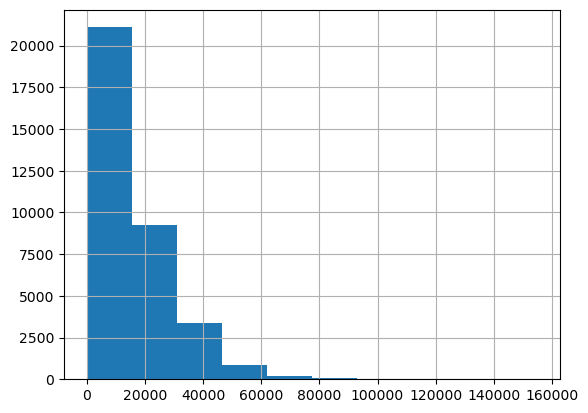

In [329]:
vehicles_datasource['price'].hist()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [318]:
vehicles_data = vehicles_datasource.drop(columns=[ 'id','VIN','model','paint_color','region','transmission','type'], axis = 1 )#


In [319]:
#One hot encoding to arrange categorical features

to_concat =  pd.DataFrame(vehicles_data [['price','odometer','year'] ] ) 
new_df = vehicles_data.drop(columns=['price','odometer','year'])

data = new_df
cat_col = data.dtypes[data.dtypes == 'O'].index.tolist() #to get the list of categorical variables
new_df.fillna("Others",inplace=True,axis = 1)
new_df = pd.get_dummies(new_df, columns=cat_col)
col_to_drop = [col for col in new_df.columns.tolist() if col.__contains__("Others")]
new_df.drop(col_to_drop, axis=1,inplace=True)
# new_df
df_encoded = pd.concat([to_concat, new_df], axis=1)
vehicles_data = df_encoded
vehicles = vehicles_data
vehicles.info()
vehicles

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Columns: 127 entries, price to state_wy
dtypes: float64(2), int64(1), uint8(124)
memory usage: 5.2 MB


,price,odometer,year,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
126,0,68472.0,2018.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,69125.0,2019.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,66555.0,2018.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,4000,155000.0,2002.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,2500,110661.0,1995.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,12995,61127.0,2016.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426792,32999,154642.0,2014.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426793,15999,36465.0,2018.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426833,6800,69550.0,1997.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


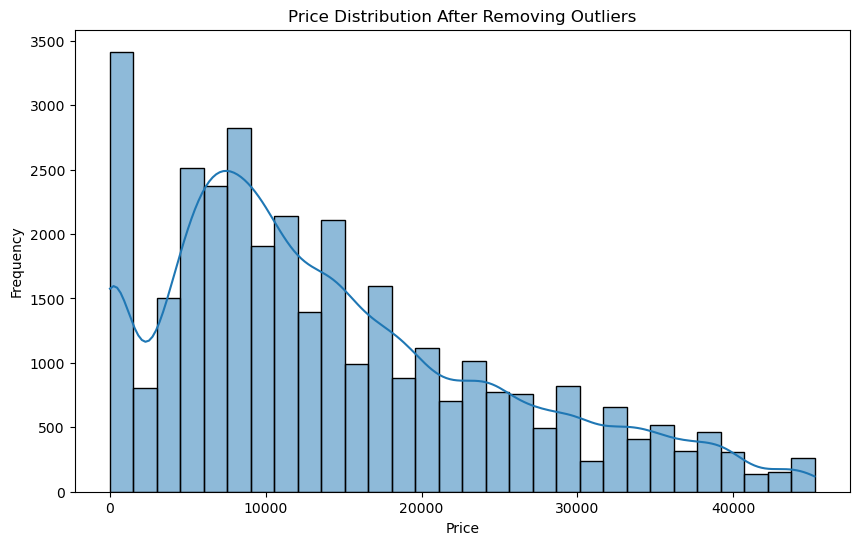

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33614 entries, 126 to 426836
Columns: 127 entries, price to state_wy
dtypes: float64(2), int64(1), uint8(124)
memory usage: 5.0 MB


In [225]:
# Calculate IQR
Q1 = vehicles['price'].quantile(0.25)
Q3 = vehicles['price'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
vehicles = vehicles[(vehicles['price'] >= lower_bound) & (vehicles['price'] <= upper_bound)]
vehicles_no_outliers = vehicles[(vehicles['price'] >= lower_bound) & (vehicles['price'] <= upper_bound)]

# Plot the distribution again
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_no_outliers['price'], bins=30, kde=True)
plt.title('Price Distribution After Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
 
vehicles.info() 


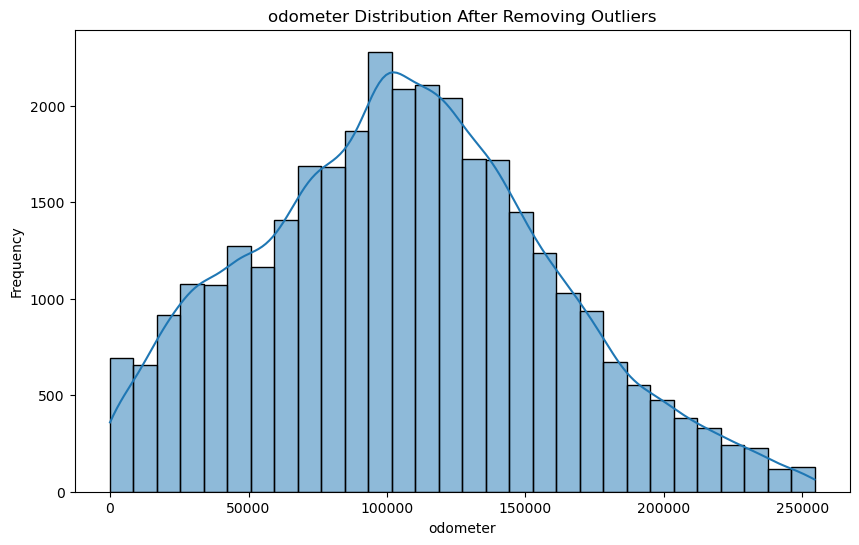

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33250 entries, 126 to 426836
Columns: 127 entries, price to state_wy
dtypes: float64(2), int64(1), uint8(124)
memory usage: 4.9 MB


In [227]:
# Calculate IQR for 'odometer'
# vehicles = 
Q1 = vehicles['odometer'].quantile(0.25)
Q3 = vehicles['odometer'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for 'odometer'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers for 'odometer'
vehicles_no_outliers = vehicles[(vehicles['odometer'] >= lower_bound) & (vehicles['odometer'] <= upper_bound)]
vehicles = vehicles[(vehicles['odometer'] >= lower_bound) & (vehicles['odometer'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(vehicles_no_outliers['odometer'], bins=30, kde=True)
plt.title('odometer Distribution After Removing Outliers')
plt.xlabel('odometer')
plt.ylabel('Frequency')
plt.show()


vehicles.info()

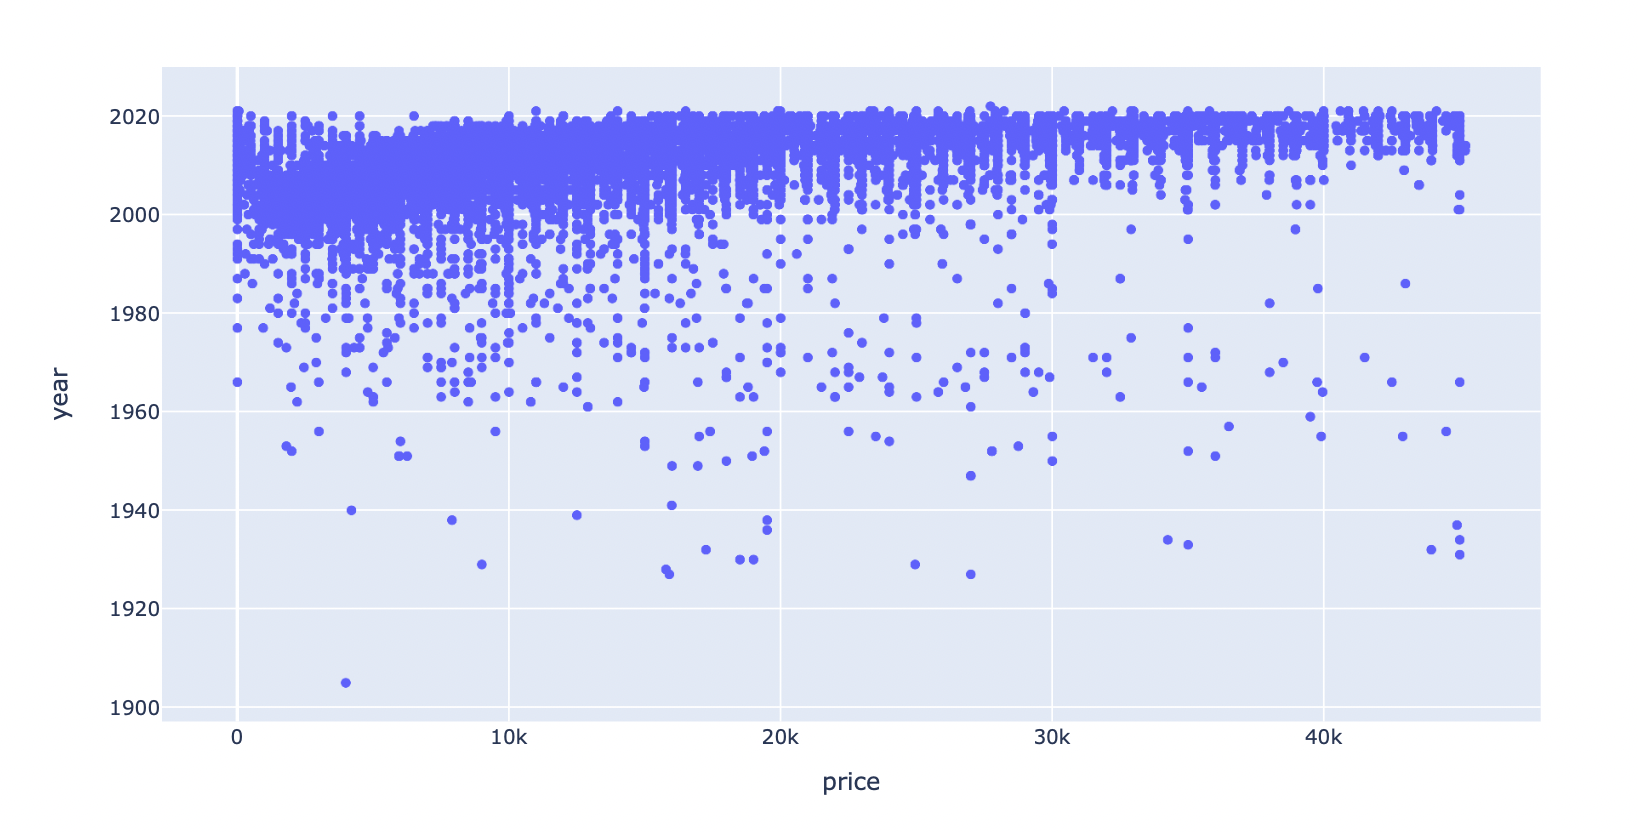

In [325]:
px.scatter(data_frame=vehicles, y='year', x='price')
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "images/"
Image(filename = PATH + "year-price-scatter.png", width=1000, height=400)


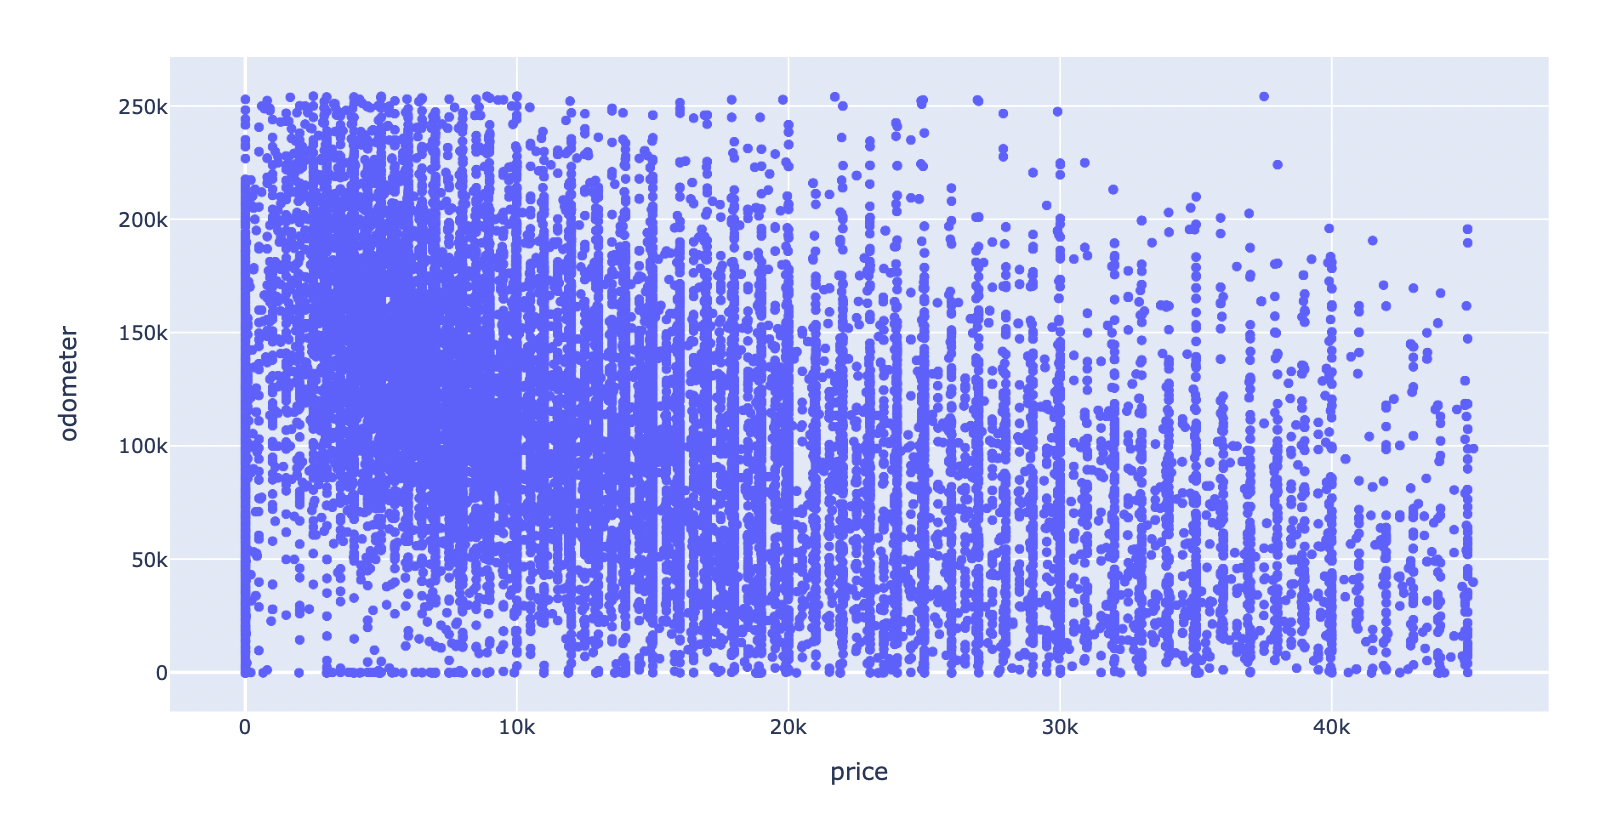

In [326]:
px.scatter(data_frame=vehicles, y='odometer', x='price')
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "images/"
Image(filename = PATH + "odometer-price-scatter.png", width=1000, height=400)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [205]:
import numpy as np
import pandas as pd
import warnings
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")


In [206]:
###Linear Regresion 
X = vehicles[['odometer']]#, x='odometer', y='price')
y = vehicles['price']
first_degree_model = LinearRegression().fit(X, y)
first_degree_mse = mean_squared_error(first_degree_model.predict(X), y)

print(type(first_degree_model))
print(first_degree_model.coef_)
print(first_degree_mse)

#degree 2 polynimial for odometer
pipe_no_bias = Pipeline([('quad_features', PolynomialFeatures(degree = 2, include_bias=False)), 
                         ('quad_model', LinearRegression())])
X = vehicles[['odometer']]
y = vehicles['price']
pipe_no_bias.fit(X, y)
no_bias_mse = float(mean_squared_error(y, pipe_no_bias.predict(X)))

# Answer check
print(type(pipe_no_bias))
print(no_bias_mse)

<class 'sklearn.linear_model._base.LinearRegression'>
[-0.05983013]
106464650.70049907
<class 'sklearn.pipeline.Pipeline'>
106233063.20775433


In [207]:
#degree 3 polynimial for odometer
cubic_pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 3, include_bias=False)), 
                       ('quad_model', LinearRegression())])
X = vehicles[['odometer']]
y = vehicles['price']
cubic_pipe.fit(X, y)
cubic_mse = float(mean_squared_error(y, cubic_pipe.predict(X)))
 
print(type(cubic_pipe))
print(cubic_mse)

#test odometer readiing 
cube_predict = cubic_pipe.predict(np.array([[2000]]))
 
print(type(cube_predict))
print(cube_predict)

<class 'sklearn.pipeline.Pipeline'>
106231275.5639182
<class 'numpy.ndarray'>
[21701.61460053]


In [208]:
#examine the effect of fitting more complex models on the automobile data. Using the Pipeline, 
#  will fit models degree 1 - 10 and evaluate the mean squared error of each model. 
mses = []
X = vehicles[['odometer']]
y = vehicles['price']
for i in range(1, 11):
    pipe = Pipeline([('quad_features', PolynomialFeatures(degree = i, include_bias = False)),
                     ('quad_model', LinearRegression())])
    pipe.fit(X, y)
    preds = pipe.predict(X)
    mse = mean_squared_error(y, preds)
    mses.append(mse)
 
#List MSEs  check
print(len(mses))
print(np.round(mses, 2))

best_complexity = mses.index(min(mses)) + 1

# Minimum MSE 
print(type(best_complexity))
print(best_complexity)


10
[1.06464651e+08 1.06233063e+08 1.06231276e+08 1.06083362e+08
 1.06542565e+08 1.07323888e+08 1.08187902e+08 1.09012673e+08
 1.09753205e+08 1.10402846e+08]
<class 'int'>
4


(24161, 1) (10355, 1)
        odometer
380747  200000.0
398717  134000.0
166742   82146.0
20756    31020.0
303680  155173.0
The Complexity that minimized Test Error was: 3


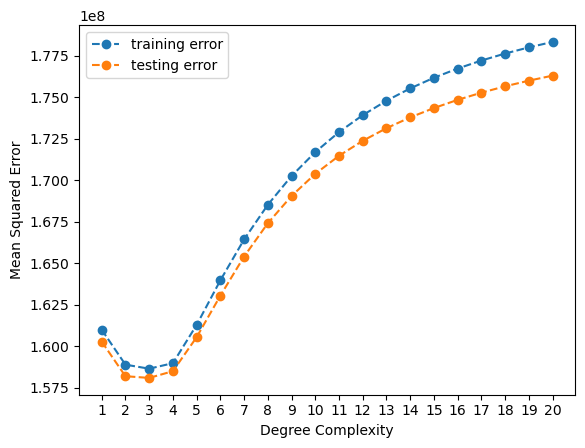

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = '', '', '', ''
X = vehicles[['odometer']]
y = vehicles[[ 'price']]
 
X_train, X_test, y1_train, y1_test = train_test_split(X, y, random_state = 32, test_size=.3)

# Answer check
print(  X_train.shape, X_test.shape)
print(X_train.head())

for i in range(1, 21):
    pipe = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)), 
                    ('linreg', LinearRegression())])
    pipe.fit(X_train, y1_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_mses.append(mean_squared_error(y1_train, train_preds))
    test_mses.append(mean_squared_error(y1_test, test_preds))
    
best_model_complexity = test_mses.index(min(test_mses)) + 1

print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')

plt.plot(range(1, 21), train_mses, '--o', label = 'training error')
plt.plot(range(1, 21), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 21), range(1, 21))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();


In [209]:
#Simple cross validation to loop through few degrees 

def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_pipe = None #placeholder for best model
    best_mse = np.inf #set best mse to infinity to begin
    for i in range(1, 21):
        pipe = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)), 
                    ('linreg', LinearRegression())])
        pipe.fit(X_train, y_train)
        test_preds = pipe.predict(X_test)
        test_mse = mean_squared_error(y_test, test_preds)
        if test_mse < best_mse:
            best_mse = test_mse
            best_pipe = pipe
    return best_pipe
 
best_model = simple_cross_validation(X_train, y1_train, X_test, y1_test)
best_model.get_params() 

#confirmation that degree 3 is best complexity 


{'memory': None,
 'steps': [('pfeat', PolynomialFeatures(degree=3, include_bias=False)),
  ('linreg', LinearRegression())],
 'verbose': False,
 'pfeat': PolynomialFeatures(degree=3, include_bias=False),
 'linreg': LinearRegression(),
 'pfeat__degree': 3,
 'pfeat__include_bias': False,
 'pfeat__interaction_only': False,
 'pfeat__order': 'C',
 'linreg__copy_X': True,
 'linreg__fit_intercept': True,
 'linreg__n_jobs': None,
 'linreg__positive': False}

In [311]:


poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X = vehicles[[ 
'year',    
'fuel_diesel', 
'odometer', 
'cylinders_8 cylinders', 
'state_ok', 
'manufacturer_ferrari', 
'drive_fwd', 
'condition_like new', 
'fuel_gas', 
'manufacturer_nissan', 
'manufacturer_chevrolet', 
'size_full-size', 
'manufacturer_dodge', 
'manufacturer_porsche',
'manufacturer_subaru',

]]
y = vehicles[[ 'price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size=.3)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
columns = poly_features.get_feature_names_out()
train_df = pd.DataFrame(X_train_poly, columns=columns)
test_df = pd.DataFrame(X_test_poly, columns = columns)

train_df.head()
columns
test_df.head()
print(train_df.info())
# print(y.info())
print(y_train.info())


X_selected_features = train_df[[ 
'size_full-size', 
'odometer fuel_gas',  
'drive_fwd^2',  
'year^2 state_ok',     
'year^2 size_full-size',  
'year cylinders_8 cylinders size_full-size',   
'year size_full-size^2' 
]]
y_selected_features = y_train
# print(X_selected_features.info()) 
# print(y_selected_features.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23275 entries, 0 to 23274
Columns: 815 entries, year to manufacturer_subaru^3
dtypes: float64(815)
memory usage: 144.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23275 entries, 299046 to 144270
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   23275 non-null  int64
dtypes: int64(1)
memory usage: 363.7 KB
None


In [247]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SequentialFeatureSelector


In [312]:
#Sequential selector to select best features 

selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=7)
best_features = selector.fit_transform(train_df, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())

best_features_df.head()
# print(best_features_df.head() )

,size_full-size,odometer fuel_gas,drive_fwd^2,year^2 state_ok,year^2 size_full-size,year cylinders_8 cylinders size_full-size,year size_full-size^2
0,0.0,80549.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,4052169.0,2013.0,2013.0
2,1.0,6735.0,0.0,0.0,4076361.0,0.0,2019.0
3,1.0,247900.0,0.0,0.0,4000000.0,2000.0,2000.0
4,1.0,109041.0,1.0,0.0,4064256.0,0.0,2016.0


In [249]:
#Linear Regression pipeline 

pipe = Pipeline([('column_selector', selector),
                ('linreg', LinearRegression())])

pipe.fit(train_df, y_train)
train_preds = pipe.predict(train_df)
test_preds = pipe.predict(test_df)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
 
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe



Train MSE:  68459358.79
Test MSE:  69604973.79


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=7)),
                ('linreg', LinearRegression())])

In [234]:
#scaling the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
print(scaler.mean_)
print('----------')
print(scaler.scale_)

scaled_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]).fit(X_train, y_train)
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

[2.01107527e+03 6.61224490e-02 1.06113734e+05 2.96068743e-01
 2.86143931e-02 4.29645542e-05 3.27175081e-01 1.09903330e-01
 9.18882922e-01 5.12996778e-02 1.52910849e-01 5.63995704e-01
 2.91299678e-02 3.13641246e-03 2.65520945e-02]
----------
[7.02814388e+00 2.48496018e-01 5.32389040e+04 4.56521678e-01
 1.66720154e-01 6.55459444e-03 4.69181785e-01 3.12769225e-01
 2.73014831e-01 2.20608297e-01 3.59901543e-01 4.95887638e-01
 1.68170784e-01 5.59157883e-02 1.60770273e-01]
Train MSE: 71033686.60216859
Test MSE: 71985947.31062101


In [308]:
#GRID Search CV , ridge

X = X_selected_features
y = y_selected_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
params_dict = {'alpha': [0.1, 1.0, 10.0]}


ridge = Ridge()#selector)
grid = GridSearchCV(ridge, param_grid=params_dict)

grid.fit(X_train, y_train)
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

best_alpha = grid.best_params_

# Answer check
print(f'Best alpha: {list(best_alpha.values())[0]}')

Train MSE: 71832958.18964341
Test MSE: 71949677.96556863
Best alpha: 0.1


In [309]:
#pipeline with StandardScaler, Ridge, Grid Search 

pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}

grid_2 = GridSearchCV(pipe, param_grid=param_dict)
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)
model_2_train_mse = mean_squared_error(y_train, train_preds)
model_2_test_mse = mean_squared_error(y_test, test_preds)
model_2_best_alpha = grid_2.best_params_

print(f'Test MSE: {model_2_test_mse}')
print(f'Best Alpha: {list(model_2_best_alpha.values())[0]}')


Test MSE: 71926465.6900488
Best Alpha: 0.001


In [330]:
# comparing the results of a Ridge regression model with that of a LinearRegression model built using 
# SequentialFeatureSelector. Both of these approaches seek to limit the complexity of the model. 
# The Ridge estimator applies a penalty that shrinks the coefficients of the model while using the 
# SequentialFeatureSelector selects a subset of features to build a model with.

selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
selector_pipe

param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)

selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)
 
print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')
 
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_
 
print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ') 
pd.DataFrame(coefs, columns = feature_names, index = ['model'])

 

Train MSE: 76132982.31157611
Test MSE: 76421602.18247604
Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('model', LinearRegression())])
Features from best selector: Index(['year', 'fuel_diesel', 'odometer', 'drive_fwd', 'size_full-size'], dtype='object').
Coefficient values: 


,year,fuel_diesel,odometer,drive_fwd,size_full-size
model,274.153344,10590.168044,-0.060051,-5280.543573,4898.245351


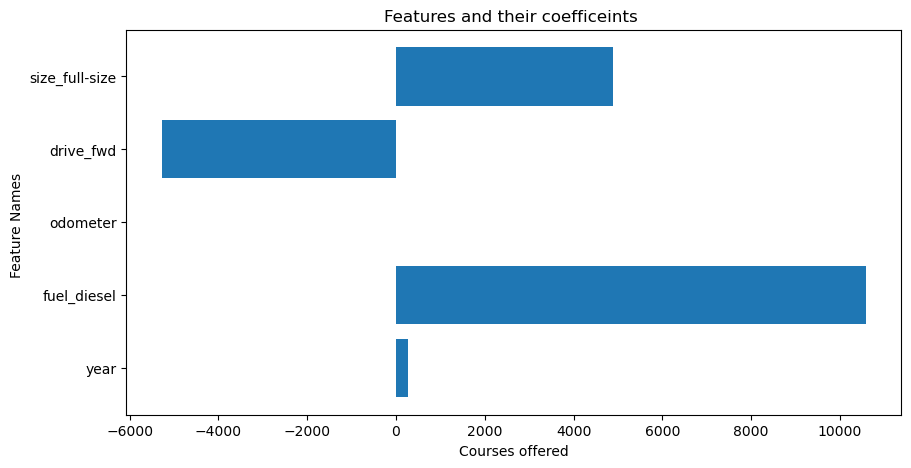

In [348]:
data = {'year': 274.153344, 'fuel_diesel': 10590.168044, 'odometer': -0.060051,
        'drive_fwd': -5280.543573,'size_full-size': 4898.245351 }
 
featureNames = list(data.keys())
coefs = list(data.values())
 
fig = plt.figure(figsize=(10, 5))    
# creating the bar plot
plt.barh(featureNames, coefs, )
 
plt.xlabel("coefficeints")
plt.ylabel("Feature Names ")
plt.title("Features and their coefficeints ")
plt.show()

In [307]:
### Rdige Regression ,StandardScaler , GridSearchCV

ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])

ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
 
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe



Train MSE: 73188564.38441557
Test MSE: 73924364.36320703


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [350]:
#permutation importance to find out features which have most contribution to the model 

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
data_to_train = vehicles.drop('price',axis = 1 )
data_target = vehicles[ 'price' ]

X_train, X_val, y_train, y_val = train_test_split(
    data_to_train, data_target, random_state=0)

model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)

featureName  =  []
coefs = [] 

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data_to_train.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        featureName.append(data_to_train.columns[i] )
        coefs.append(r.importances_mean[i] )


year    0.109 +/- 0.004
fuel_diesel0.089 +/- 0.003
odometer0.044 +/- 0.001
cylinders_8 cylinders0.031 +/- 0.002
state_ok0.025 +/- 0.002
manufacturer_ferrari0.019 +/- 0.001
drive_fwd0.018 +/- 0.002
condition_like new0.016 +/- 0.001
fuel_gas0.016 +/- 0.001
manufacturer_nissan0.015 +/- 0.001
manufacturer_chevrolet0.014 +/- 0.001
size_full-size0.012 +/- 0.001
manufacturer_dodge0.011 +/- 0.001
manufacturer_porsche0.010 +/- 0.001
manufacturer_subaru0.010 +/- 0.001
state_fl0.008 +/- 0.001
manufacturer_bmw0.008 +/- 0.001
state_ak0.008 +/- 0.001
manufacturer_ford0.008 +/- 0.001
drive_4wd0.006 +/- 0.001
manufacturer_kia0.006 +/- 0.001
manufacturer_chrysler0.006 +/- 0.001
manufacturer_hyundai0.005 +/- 0.001
state_ar0.005 +/- 0.001
manufacturer_honda0.005 +/- 0.001
cylinders_4 cylinders0.005 +/- 0.001
manufacturer_mercedes-benz0.005 +/- 0.001
state_oh0.004 +/- 0.001
manufacturer_jeep0.004 +/- 0.001
manufacturer_toyota0.004 +/- 0.001
manufacturer_cadillac0.004 +/- 0.001
condition_good0.004 +/- 0.00

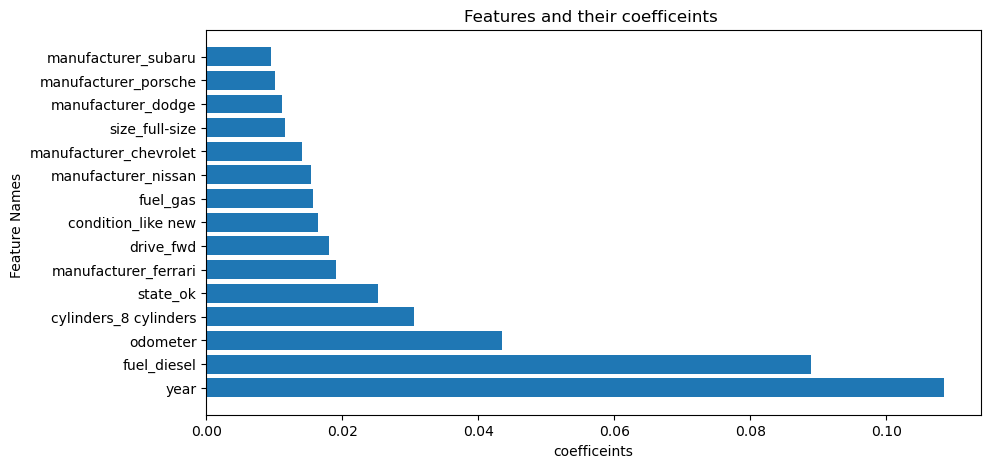

In [354]:
# Next iteration - picking features for training
# year    
# fuel_diesel 
# odometer 
# cylinders_8 cylinders 
# state_ok 
# manufacturer_ferrari 
# drive_fwd 
# condition_like new 
# fuel_gas 
# manufacturer_nissan 
# manufacturer_chevrolet 
# size_full-size 
# manufacturer_dodge 
# manufacturer_porsche 
# manufacturer_subaru 



featureNameSelect = []  
coefsSelect = []   
for i in range(0,15):
    featureNameSelect.append(featureName[i])
    coefsSelect.append(coefs[i])
 
fig = plt.figure(figsize=(10, 5))    
# creating the bar plot
plt.barh(featureNameSelect, coefsSelect, )
 
plt.xlabel("coefficeints")
plt.ylabel("Feature Names ")
plt.title("Features and their coefficeints ")
plt.show()
 

Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
##########################################################################################
# Initially testing a simple linear regression for 1 feature - odomoter with target price
##########################################################################################
# Linear Regresion for #, x='odometer', y='price'
#against only 1 parameter = odometer....print(no_bias_mse)  
163437215.44974095

#degree 3 polynimial for print(cube_predict) 
[30685.39430531]

#examine the effect of fitting more complex models on the automobile data. Using the Pipeline, 
#  will fit models degree 1 - 10 and evaluate the mean squared error of each model.
#List MSEs  check
[1.67547313e+08 1.63437215e+08 1.62333126e+08 1.66557138e+08
 1.75600763e+08 1.83300750e+08 1.88400997e+08 1.91504196e+08
 1.93301624e+08 1.94322837e+08]
 
The Complexity that minimized Test Error was: 3

# Simple cross validation to loop through few degrees 
# best_model.get_params() 
Confirmation that degree 3 is best complexity 

# We have run through linear regression with only 1 parameter above to see the impact of 1 parameter.
# This is a basic model and may not scale for various features.
# We will keep this model for informational purposes but will not use for future trainings/ prediction

In [ ]:
################################################################################################
#expanding to multiple features 
# X = vehicles[[ 
# 'year',    
# 'fuel_diesel', 
# 'odometer', 
# 'cylinders_8 cylinders', 
# 'state_ok', 
# 'manufacturer_ferrari', 
# 'drive_fwd', 
# 'condition_like new', 
# 'fuel_gas', 
# 'manufacturer_nissan', 
# 'manufacturer_chevrolet', 
# 'size_full-size', 
# 'manufacturer_dodge', 
# 'manufacturer_porsche',
# 'manufacturer_subaru',
# ]]
################################################################################################

# In iteration one we use above parameters to train and test and predict the values.
# The resule of MSEs with different models is a below 


##Sequential selector to select best features 
#OUTPUT #BEST FEATURES AS --- size_full-size  ,odometer fuel_gas ,drive_fwd^2 ,year^2 state_ok    
#,year^2 size_full-size ,year cylinders_8 cylinders size_full-size  

##Linear Regression pipeline  with selector , using above selector
Train MSE:  68459358.79
Test MSE:  69604973.79
              
# scaled_pipe = Pipeline StandardScaler , Ridge
Train MSE: 71033686.60216859
Test MSE: 71985947.31062101
              
#Grid Search CV - using ridge regression
Train MSE: 71574478.86221454
Test MSE: 70602226.28890006
Best alpha: 10.0
              
#pipeline with StandardScaler, Ridge, Grid Search 
Test MSE: 70601890.41384704
Best Alpha: 100.0   
              
        
# comparing the results of a Ridge regression model with that of a LinearRegression model built using 
# SequentialFeatureSelector. Both of these approaches seek to limit the complexity of the model. 
# The Ridge estimator applies a penalty that shrinks the coefficients of the model while using the 
# SequentialFeatureSelector selects a subset of features to build a model with.

Train MSE: 76132982.31157611
Test MSE: 76421602.18247604

###  Ridge Regression Pipeline  StandardScaler Ridge
Train MSE: 71573796.48717281
Test MSE: 70607407.28218971
    
    
# We see that approximate MSE with most models is around ~ 70607407
# with Linear Regression being least - 68459358
# and SequentialFeatureSelector with Linear Regression  highest - 76132982

In [ ]:
################################################################################################
#expanding to multiple features 
################################################################################################
#Features/columns  are 

# 'year',
# 'fuel_diesel',
# 'odometer', 
# 'cylinders_8 cylinders', 
# 'state_ok', 
# 'manufacturer_ferrari', 
# 'drive_fwd', 
# 'condition_like new', 
# 'fuel_gas', 
# 'manufacturer_nissan', 
# 'manufacturer_chevrolet', 
# 'size_full-size', 
# 'manufacturer_dodge', 
# 'manufacturer_porsche', 
# 'manufacturer_subaru', 
# 'state_fl', 
# 'manufacturer_bmw', 
# 'state_ak', 
# 'manufacturer_ford', 
# 'drive_4wd', 
# 'manufacturer_kia', 
# 'manufacturer_chrysler',
# 'manufacturer_hyundai',
# 'state_ar', 
# 'manufacturer_honda', 
# 'cylinders_4 cylinders', 
# 'manufacturer_mercedes-benz',
# 'state_oh', 
# 'manufacturer_jeep', 
# 'manufacturer_toyota', 
# 'manufacturer_cadillac', 
# 'condition_good', 
# 'size_compact', 
# 'manufacturer_gmc', 
# 'manufacturer_infiniti', 
# 'condition_new', 
# 'condition_fair', 
# 'state_ct', 
# 'drive_rwd', 
# 'manufacturer_tesla', 
# 'manufacturer_volkswagen', 
# 'manufacturer_lexus', 
# 'fuel_hybrid', 
# 'state_mi', 
# 'manufacturer_ram', 
# 'manufacturer_mercury', 
# 'state_ma', 
# 'state_sc', 
# 'manufacturer_buick', 
# 'state_tn', 
# 'state_ks', 
# 'state_vt', 
# 'manufacturer_acura', 
# 'manufacturer_mitsubishi', 
# 'title_status_lien', 
# 'manufacturer_mazda',
# 'state_ny', 
# 'manufacturer_jaguar', 
# 'manufacturer_aston-martin',
# 'manufacturer_lincoln', 
# 'state_hi', 
# 'manufacturer_audi', 
# 'state_la', 
# 'manufacturer_saturn', 
# 'state_nm', 
# 'state_nc', 
# 'manufacturer_harley-davidson', 
# 'title_status_rebuilt', 
# 'state_mt', 
# 'state_ia', 
# 'state_az', 
# 'manufacturer_pontiac', 
# 'manufacturer_mini',
# 'state_mo', 
# 'fuel_electric', 
# 'manufacturer_rover'


# In iteration 2  we all one hot encoded features to train and test and predict the values.
# The resule of MSEs with different models is a below 

#Grid Search CV - using ridge regression
#************using all the one hot encoded data set features
Train MSE: 57632143.06312997
Test MSE: 5957670
Best alpha: 10.0
    
#pipeline with StandardScaler, Ridge, Grid Search 
#***********using all the one hot encoded data set
Test MSE: 61659582.98907308
Best Alpha: 1.0

#pipeline with SequentialFeatureSelector-LinearRegression 
#------------no response - too long time #------------

### pipeline with  StandardScaler, RidgeRegression
#------------no response - too long time#------------ 

# Model with minumum MSE == #Grid Search CV - using ridge regression
# Train MSE: 57632143 


#Recommendation:
We get a minimum MSE if we use all parameters, but this is not scalable as data grows.
As we saw above some models took too long to process or could not complete.
We will explore limited set of features


In [ ]:

################################################################################
### using features obtained from permutation importance 
# size_full-size 
# odometer fuel_gas 
# drive_fwd^2 
# year^2 state_ok    
# year^2 size_full-size 
# year cylinders_8 cylinders size_full-size  
# year size_full-size^2 
################################################################################
# In iteration 3  we use above parameters to train and test and predict the values.
# The resule of MSEs with different models is a below 

#Grid Search CV - using ridge regression
Train MSE: 71832958.18964341
Test MSE: 71949677.96556863
Best alpha: 0.1
    

#pipeline with StandardScaler, Ridge, Grid Search 
#***********using all the one hot encoded data set
Test MSE: 71926465.6900488
Best Alpha: 0.001
    
#pipeline with SequentialFeatureSelector-LinearRegression 
Train MSE: 72970004.73216979
Test MSE: 72723494.5166693
# Features from best selector: 
#  'size_full-size', 
#  'odometer fuel_gas',
#  'drive_fwd^2',       
#  'year^2 size_full-size', 
#  'year size_full-size^2',


### pipeline with  StandardScaler, RidgeRegression  
Train MSE: 73188564.38441557
Test MSE: 73924364.36320703

# Model with minumum MSE == #Grid Search CV - using ridge regression
# Train MSE: 71832958 

In [ ]:

Features that can be used to decide the drivers of car prices are :
# size_full-size 
# odometer fuel_gas 
# drive_fwd^2 
# year^2 state_ok    
# year^2 size_full-size 
# year cylinders_8 cylinders size_full-size  
# year size_full-size^2 

The Model that can be leveraged is #Grid Search CV - using ridge regression


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

About this ML model Project:

This business problem has been turned into a data science problem and related techniques have been implemented.

This Data Science / ML project intends to process car sales related data set, infer the data,
create ML models which can be used to predict the factor driving sales price of the car. 
The Data set is analysed and formatted first to remove unwanted and erroneous factors.
The numerical and categorical data is also handled such that they can be used together for training the model.

The dataset is split into train and test data set and models are trained and values are predicted. 

    
The model and features suggested are determined on minimum MSE and processing speed of the model and scalability

What-

This model is provided to predict what features in what magnitude can drive the car prices.
This    with minimal effort, can  help to identify various factors contributing to price changes.

How-

The list of features to be used should be  provided.[ In order to be ingested by the  model, ]
user just needs to provide the known values of the feature/attributes , 
and the model outputs expected price of the car. 

Gaps-

There can definitely be minor errors between actual price change and predicted price change,
but this model uses current resources efficiently and provides optimal output given the constraints.

Future Work-

If large gaps are noticed repeatedly the model can be fine tuned with more parameters and 
newer data set to remove the gap or errors.
